# Problem Set 1: Analysis of racial disparities in felony sentencing

# 0. Load packages and imports

In [109]:
## basic functionality
import pandas as pd
import numpy as np
import re

## can add others if you need them
import matplotlib.pyplot as plt

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [3]:
## load data on sentencing
df = sentencing_data = pd.read_csv("sentencing_asof0405.csv")

/var/folders/zx/q7j5cvlj64967x1rx40j70l80000gn/T/ipykernel_44028/815673121.py:2: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = sentencing_data = pd.read_csv("sentencing_asof0405.csv")


## 0.2: Print head, dimensions, info (0 points)

In [7]:
## print head
df.head()
## print dimensions
df.shape
## print info
df.info()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


(248146, 41)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            248146 non-null  int64  
 1   CASE_PARTICIPANT_ID                248146 non-null  int64  
 2   RECEIVED_DATE                      248146 non-null  object 
 3   OFFENSE_CATEGORY                   248146 non-null  object 
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool   
 5   CHARGE_ID                          248146 non-null  int64  
 6   CHARGE_VERSION_ID                  248146 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object 
 8   CHARGE_COUNT                       248146 non-null  int64  
 9   DISPOSITION_DATE                   248146 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        248146 non-null  object 
 11  DISPOSITION_CHARGED_ACT            2427

# Part one: data cleaning/interpretation

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [9]:
## printing number of unique values for 3 CASE_ID, CASE_PARTICIPANT_ID, CHARGE_ID columns:
df[["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID"]].nunique() 


CASE_ID                197519
CASE_PARTICIPANT_ID    211977
CHARGE_ID              229015
dtype: int64

In [11]:
## There are more unique people than unique cases because some of the cases involve
## multiple people or co-defendants. 

## Example of a case involving multiple people:
participants_per_case = df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique()
example_case_id = participants_per_case[participants_per_case > 1].index[0]

df[df["CASE_ID"] == example_case_id][["CASE_ID", "CASE_PARTICIPANT_ID"]].drop_duplicates()
## Here we are interested in looking at one case that has at least 2 unique participants. We drop duplicates so that it doesn't list 
## participants more than once. As we can see, Case #166402790922 involves 2 participants: 144234439761 and 144234534133.


,CASE_ID,CASE_PARTICIPANT_ID
92,166402790922,144234439761
102,166402790922,144234534133


In [13]:
## There are more unique charges than unique people because, in some cases, people are charged
## with multiple offenses.

## Example of one person being charged with multiple unique offenses in a case: 
charges_per_person = df.groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].nunique()
example_person_id = charges_per_person[charges_per_person > 1].index[0]

df[df["CASE_PARTICIPANT_ID"] == example_person_id][["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID"]].drop_duplicates()
## Here we are interested in looking at one participant that has at least 2 unique charges for one case. As we can see, for Case #290136075812,
## participant 97581722610 has 4 unique charges: 138443602912, 138495990272, 138496040547, 138495939996.

,CASE_ID,CASE_PARTICIPANT_ID,CHARGE_ID
10561,290136075812,97581722610,138443602912
10562,290136075812,97581722610,138495990272
10563,290136075812,97581722610,138496040547
10564,290136075812,97581722610,138495939996


In [15]:
## Print the mean and median number of charges per case. **For all of these calcuations, I am assuming
## we are interested in the mean/median number of UNIQUE charges or participants.

charges_per_case = df.groupby("CASE_ID")["CHARGE_ID"].nunique()
print("mean unique charges per case: " + str(charges_per_case.mean()))
print("median unique charges per case: " + str(charges_per_case.median()))


mean unique charges per case: 1.1594580774507768
median unique charges per case: 1.0


In [17]:
## Print the mean and median number of charges per participant. **For all of these calcuations, I am assuming
## we are interested in the mean/median number of UNIQUE charges or participants.

charges_per_participant = df.groupby("CASE_PARTICIPANT_ID")["CHARGE_ID"].nunique()
print("mean unique charges per participant: " + str(charges_per_participant.mean()))
print("median unique charges per participant: " + str(charges_per_participant.median()))


mean unique charges per participant: 1.1261457610967227
median unique charges per participant: 1.0


In [19]:
## Print the mean and median number of participants per case. **For all of these calcuations, I am assuming
## we are interested in the mean/median number of UNIQUE charges or participants.

participants_per_case = df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique()
print("mean unique participants per case: " + str(participants_per_case.mean()))
print("median unique participants per case: " + str(participants_per_case.median()))

mean unique participants per case: 1.0731980214561636
median unique participants per case: 1.0


In [23]:
## Given the following check, the data does not seem to enable us to follow the same 
## defendant across different cases, as each CASE_PARTICIPANT_ID appears in only one CASE_ID
## and there are no other participant ID variables that we can use.

participant_case_count = df.groupby("CASE_PARTICIPANT_ID")["CASE_ID"].nunique()
participants_w_mult_cases = participant_case_count[participant_case_count > 1]
print(participants_w_mult_cases.head())

## Since no participants are printed in the output, no participant_ID is associated with
## more than one case. Defendants do not appear in multiple cases, so we cannot track them across cases.

## We use this to check if there are alternative participant ID columns that may track participants across cases. 
## From the output, we see that this isn't so.
## print([col for col in df.columns if "ID" in col])

Series([], Name: CASE_ID, dtype: int64)


## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be


In [139]:
## Summarize the differences between OFFENSE_CATEGORY and UPDATED_OFFENSE_CATEGORY:

## OFFENSE_CATEGORY corresponds to the offense assigned to an individual at the time 
## when initial charges are filed. As the case evolves, the offense assigned to an individual 
## can change, so UPDATED_OFFENSE_CATEGORY reflects the most recent offense charge brought
## against an individual. 


In [25]:
## Construct "is_changed_offense" indicator
is_changed_offense = df["OFFENSE_CATEGORY"] != df["UPDATED_OFFENSE_CATEGORY"]
df["is_changed_offense"] = is_changed_offense

## check:
## df[["OFFENSE_CATEGORY", "UPDATED_OFFENSE_CATEGORY", "is_changed_offense"]]


## What are the most common changes offenses?
changed_offenses = df[df["is_changed_offense"]== True]
changed_offenses_count = changed_offenses["OFFENSE_CATEGORY"].value_counts().sort_values(ascending=False)
changed_offenses_count

## The most common changed offenses are PROMIS Conversion, DUI, and Unlawful Use of Weapon.

OFFENSE_CATEGORY
PROMIS Conversion               6394
DUI                             3896
UUW - Unlawful Use of Weapon    2155
Other Offense                   2125
Aggravated Battery              1927
                                ... 
Perjury                            4
Prostitution                       3
Compelling Gang Membership         2
Benefit Recipient Fraud            2
Violate Bail Bond                  2
Name: count, Length: 88, dtype: int64

In [27]:
## Print one example of a changed offense from one of these categories and comment on what the reason may be

changed_example = df[(df["is_changed_offense"]) & (df["OFFENSE_CATEGORY"].str.contains("DUI"))].head(1)
changed_example[["CASE_ID", "CASE_PARTICIPANT_ID", "OFFENSE_CATEGORY", "UPDATED_OFFENSE_CATEGORY", "is_changed_offense"]]

## Maybe  this defendant's offense was changed from Aggravated DUI to Driving With a Suspended or Revoked
## License because the prosecution didn't have enough evidence to prove that he/she was drinking
## and driving or because the defense attornery worked out a deal to make the offense and resulting sentence
## less severe.

,CASE_ID,CASE_PARTICIPANT_ID,OFFENSE_CATEGORY,UPDATED_OFFENSE_CATEGORY,is_changed_offense
2048,217767855783,209397040606,Aggravated DUI,Driving With Suspended Or Revoked License,True


## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [29]:
## First combine all "Aggravated" offenses into a single category w/o prefix

df["simplified_offense_derived"] = df["UPDATED_OFFENSE_CATEGORY"]
df["simplified_offense_derived"] = df["UPDATED_OFFENSE_CATEGORY"].apply(
    lambda x: x.replace("Aggravated ", "") if x.startswith("Aggravated ") else x
)

## Check:
## df["UPDATED_OFFENSE_CATEGORY"].str.startswith("Aggravated ").sum()
## df["simplified_offense_derived"].str.startswith("Aggravated ").sum()

In [33]:
## Now combine other types of offenses according to the descriptions above:

conditions = [
    df["UPDATED_OFFENSE_CATEGORY"].str.contains("arson", case=False, na=False),
    df["UPDATED_OFFENSE_CATEGORY"].str.contains("homicide", case=False, na=False),
    df["UPDATED_OFFENSE_CATEGORY"].str.contains("vehicle|vehicular", case=False, na=False),
    df["UPDATED_OFFENSE_CATEGORY"].str.contains("battery", case=False, na=False),
]

categories = [
    "Arson",
    "Homicide",
    "Vehicle-related",
    "Battery"
]

df["simplified_offense_derived"] = np.select(
    conditions,
    categories,
    default = df["simplified_offense_derived"])

## Check:
## df[["UPDATED_OFFENSE_CATEGORY", "simplified_offense_derived"]][df["simplified_offense_derived"].str.contains("homicide|arson|vehicle|vehicular|batter",case=False, na=False)].sample(20)

In [35]:
## Print difference between # of unique offenses in original offense category and simplified offense category:

original_unique = df["UPDATED_OFFENSE_CATEGORY"].nunique()
simplified_unique = df["simplified_offense_derived"].nunique()


print("Difference between original and simplified offenses:", original_unique - simplified_unique)

## Check:
## original_unique
## simplified_unique

## df["UPDATED_OFFENSE_CATEGORY"].unique()
## df["simplified_offense_derived"].unique()

Difference between original and simplified offenses: 14


## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [37]:
## Race:
## to se what the race categories are:
## df["RACE"].unique()

df["is_black_derived"] = df["RACE"].str.contains("Black", case=False, na=False)
df["is_hisp_derived"] = df["RACE"].str.contains("Hispanic", case=False, na=False) & ~df["is_black_derived"]
df["is_white_derived"] = df["RACE"].str.contains("White", case=False, na=False) & ~df["is_hisp_derived"]
df["is_othereth_derived"] = ~df["is_black_derived"] & ~df["is_hisp_derived"] & ~df["is_white_derived"]

## check - we hope to see all the race variables coded correctly:
## df[["RACE", "is_black_derived", "is_hisp_derived", "is_white_derived", "is_othereth_derived"]].sample(50)


In [39]:
## Gender:
df["is_male_derived"] = df["GENDER"].str.strip().str.lower() == "male"

## check - we hope to see is_male_derived coded correctly:
## df[["GENDER", "is_male_derived"]].sample(50)

In [41]:
## Age at Incident:
df["age_derived"] = df["AGE_AT_INCIDENT"]
age_cap = df["age_derived"].quantile(0.9999)
df.loc[df["age_derived"] > age_cap, "age_derived"] = age_cap

## check - we hope to see 0 rows:
## print(df[df["age_derived"] > age_cap].shape)


In [77]:
## Sentencing Date: 
df["sentencing_date_clean"] = df["SENTENCE_DATE"].astype(str).str.strip()

## This is repetitive, but it was faster for me to do it this way than with a loop.
df["sentencing_date_clean"] = df["sentencing_date_clean"].str.replace("291", "201")
df["sentencing_date_clean"] = df["sentencing_date_clean"].str.replace("221", "201")
df["sentencing_date_clean"] = df["sentencing_date_clean"].str.replace("220", "200")  
df["sentencing_date_clean"] = df["sentencing_date_clean"].str.replace("211", "201")
df["sentencing_date_clean"] = df["sentencing_date_clean"].str.replace("210", "200")

df["sentenceymd_derived"] = pd.to_datetime(df["sentencing_date_clean"], errors="coerce")
df["sentenceym_derived"] = df["sentenceymd_derived"].dt.to_period("M").dt.to_timestamp()

## since we no longer need this cleaned date column anymore:
df = df.drop(columns=["sentencing_date_clean"])

## Checks - we hope to not see any wonky years:
## df["sentenceymd_derived"].dt.year.unique()
## df["sentenceym_derived"].dt.year.unique()
## df[["SENTENCE_DATE", "sentenceymd_derived", "sentenceym_derived"]].sample(20)


/var/folders/zx/q7j5cvlj64967x1rx40j70l80000gn/T/ipykernel_44028/4294631153.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["sentenceymd_derived"] = pd.to_datetime(df["sentencing_date_clean"], errors="coerce")


In [79]:
## Sentencing Judge:
df["judges_cleaned"] = df["SENTENCE_JUDGE"].astype(str)

## Dealing with Doug and Shelley:
is_doug = df["SENTENCE_JUDGE"].str.contains("Douglas", case=False, na=False) & df["SENTENCE_JUDGE"].str.contains("Simpson", case=False, na=False)

is_shelley = df["SENTENCE_JUDGE"].str.contains("Sutker-", case=False, na=False)

df.loc[is_doug, "judges_cleaned"] = "Doug Simpson"
df.loc[is_shelley, "judges_cleaned"] = "Shelley Sutker"


## Check we cleaned Doug and Shelley's names the right way:
## df[df["SENTENCE_JUDGE"].str.contains("Simpson", case=False, na=False)][["SENTENCE_JUDGE", "judges_cleaned"]].drop_duplicates()
## df[df["SENTENCE_JUDGE"].str.contains("Sutker", case=False, na=False)][["SENTENCE_JUDGE", "judges_cleaned"]].drop_duplicates()

## To do the rest of judgeid:
##list of unique judge names
judge_names = list(df["judges_cleaned"].unique())

## Looked up how to use name split online, since I was having trouble figuring out how 
## to split by spaces given lots of judges have middle names included.
judge_names.sort(key=lambda name: (name.split()[0].lower(), name.split()[-1].lower()))

## we add 1 to i so that we start counting judges at 1, not 0; the length of judge_names tells
## us how many unique judges there are, so we can code by this
judge_ids = ["judge_" + str(i + 1) for i in range(len(judge_names))]

judge_id_dict = dict(zip(judge_names, judge_ids))

df["judgeid_derived"] = df["judges_cleaned"].map(judge_id_dict)

## since we no longer need the cleaned judge column anymore:
df = df.drop(columns=["judges_cleaned"])

## Check - we hope to see unique judges have only one judgeid_derived value and that 
## first names early on in the alphabet correspond to low ID numbers. We also want the output
## to show that every judge in judges_cleaned column has exactly one unique judgeid_derived. 
## df[["SENTENCE_JUDGE", "judgeid_derived"]].sample(20)
## df.groupby("judges_cleaned")["judgeid_derived"].nunique().value_counts()


In [81]:
## print a random sample of 10 rows 
df[["RACE", "is_black_derived", "is_hisp_derived", "is_white_derived", "is_othereth_derived", "GENDER", "is_male_derived", 
    "AGE_AT_INCIDENT", "age_derived", "SENTENCE_DATE", "sentenceymd_derived", "sentenceym_derived", "SENTENCE_JUDGE", "judgeid_derived"]].sample(10)

,RACE,is_black_derived,is_hisp_derived,is_white_derived,is_othereth_derived,GENDER,is_male_derived,AGE_AT_INCIDENT,age_derived,SENTENCE_DATE,sentenceymd_derived,sentenceym_derived,SENTENCE_JUDGE,judgeid_derived
131807,Black,True,False,False,False,Male,True,29.0,29.0,8/18/2014 12:00:00 AM,2014-08-18,2014-08-01,Sharon M Sullivan,judge_278
225864,Black,True,False,False,False,Female,False,40.0,40.0,8/31/2018 12:00:00 AM,2018-08-31,2018-08-01,Joan Margaret O'Brien,judge_135
109370,White [Hispanic or Latino],False,True,False,False,Male,True,57.0,57.0,10/24/2013 12:00:00 AM,2013-10-24,2013-10-01,Clayton Jay Crane,judge_41
112503,Black,True,False,False,False,Male,True,26.0,26.0,11/27/2013 12:00:00 AM,2013-11-27,2013-11-01,Noreen Valeria Love,judge_239
178457,Black,True,False,False,False,Male,True,27.0,27.0,3/31/2016 12:00:00 AM,2016-03-31,2016-03-01,Stanley Sacks,judge_287
243840,White [Hispanic or Latino],False,True,False,False,Male,True,19.0,19.0,11/5/2020 12:00:00 AM,2020-11-05,2020-11-01,Shelley Sutker-Dermer,judge_283
212481,White [Hispanic or Latino],False,True,False,False,Male,True,24.0,24.0,1/3/2019 12:00:00 AM,2019-01-03,2019-01-01,Domenica A Stephenson,judge_63
152010,White [Hispanic or Latino],False,True,False,False,Male,True,21.0,21.0,1/7/2016 12:00:00 AM,2016-01-07,2016-01-01,Evelyn B Clay,judge_85
43355,Black,True,False,False,False,Male,True,22.0,22.0,10/24/2011 12:00:00 AM,2011-10-24,2011-10-01,Evelyn B Clay,judge_85
235359,White,False,False,True,False,Male,True,NaN,NaN,6/21/2019 12:00:00 AM,2019-06-21,2019-06-01,Ramon Ocasio,judge_256


## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [83]:
## subset to cases where only one participant is charged
participants_per_case = df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique()
single_participant_cases = df[df["CASE_ID"].isin(participants_per_case[participants_per_case == 1].index)]

##Check:
## participants_per_case_subset = single_participant_cases.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique()
## print(participants_per_case_subset[participants_per_case_subset > 1])


In [85]:
## go from participant-case level data to a participant's primary charge and current sentence
primary_current = single_participant_cases[
    (single_participant_cases["PRIMARY_CHARGE_FLAG"] == True) &
    (single_participant_cases["CURRENT_SENTENCE_FLAG"] == True)
]

## Check:
## participant_charge_counts = primary_current.groupby("CASE_PARTICIPANT_ID").size()
## multiple_charges = participant_charge_counts[participant_charge_counts > 1]
## print(f"Number of participants with multiple charges: {len(multiple_charges)}")


In [87]:
## Filter out observations where judge is nan or nonsensical:
valid_judges = primary_current["SENTENCE_JUDGE"].notna() & (primary_current["SENTENCE_JUDGE"].str.strip().str.upper() != "FLOOD")

primary_current = primary_current[valid_judges == True]

## Check:
## print("NaN judge count:", primary_current["SENTENCE_JUDGE"].isna().sum())
## flood_judges = primary_current["SENTENCE_JUDGE"].str.strip().str.upper() == "FLOOD"
## print("FLOOD judge count:", flood_judges.sum())

## To see if any other null words appear for judges
#null_strings = ["null", "none", "nan", "na", "n/a", ""]

#judge_col = primary_current["SENTENCE_JUDGE"].astype(str).str.strip().str.lower()
#fake_null_judges = judge_col.isin(null_strings)

#print("Fake 'null' judge count:", fake_null_judges.sum())


In [89]:
## Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

start_date = pd.to_datetime("2012-01-01")
end_date = pd.to_datetime("2021-04-05")

filtered_data = primary_current[(primary_current["sentenceymd_derived"] >= start_date) &
(primary_current["sentenceymd_derived"] <= end_date)
]

In [91]:
## print number of rows in data
len(filtered_data)

## Check to see whether our cleaned data matched the version we read in for part 2:
## filtered_data.shape

135165

(135165, 52)

# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [93]:
df_cleaned = pd.read_pickle("sentencing_cleaned.pkl")
df_cleaned

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
9,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40
16,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310
18,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_162
19,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,Narcotics,True,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_331
26,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248141,445516248775,905289187184,2/3/2021 12:00:00 AM,Home Invasion,True,447867029248,836341344232,AGGRAVATED UNLAWFUL USE OF WEAPON,1,3/19/2021 12:00:00 AM,...,UUW - Unlawful Use of Weapon,True,False,False,False,False,19.0,2021-03-19,2021-03-01,judge_8
248142,445527409730,905322500577,2/4/2021 12:00:00 AM,Domestic Battery,True,447970697900,836537247156,DOMESTIC BATTERY,1,3/23/2021 12:00:00 AM,...,Battery,True,False,False,False,True,32.0,2021-03-23,2021-03-01,judge_294
248143,445587767000,905518794790,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447955866546,837760215766,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_99
248144,445592613204,905533705601,2/9/2021 12:00:00 AM,Driving With Suspended Or Revoked License,True,447966223356,837758347354,DRIVING ON SUSPENDED LICENSE,1,3/11/2021 12:00:00 AM,...,Driving With Suspended Or Revoked License,False,False,True,False,True,29.0,2021-03-11,2021-03-01,judge_99


## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

In [111]:
## tabulate and visualize the proportion of defendants who are Black and White; print table
total_month_year = df_cleaned.groupby("sentenceym_derived")["CASE_ID"].nunique()

## we use "size" because we want to count the number of rows where is_black_derived or is_white_derived
## is true for every year-month
black_month_year = df_cleaned[df_cleaned["is_black_derived"]==True].groupby("sentenceym_derived").size()
white_month_year = df_cleaned[df_cleaned["is_white_derived"]==True].groupby("sentenceym_derived").size()

## printing the table by making a new data frame
prop_table = pd.DataFrame()
prop_table["black_proportion"] = black_month_year / total_month_year
prop_table["white_proportion"] = white_month_year / total_month_year

## reset index and rename column so it looks better:
prop_table = prop_table.reset_index().rename(columns = {"sentenceym_derived": "month_year"})

prop_table


,month_year,black_proportion,white_proportion
0,2012-01-01,0.677419,0.144564
1,2012-02-01,0.648966,0.160690
2,2012-03-01,0.638958,0.158189
3,2012-04-01,0.696379,0.146936
4,2012-05-01,0.695146,0.144337
...,...,...,...
106,2020-11-01,0.606925,0.154786
107,2020-12-01,0.646182,0.158287
108,2021-01-01,0.621924,0.111857
109,2021-02-01,0.651731,0.134420


<Figure size 1200x800 with 0 Axes>

(array([14975., 15340., 15706., 16071., 16436., 16801., 17167., 17532.,
        17897., 18262., 18628.]),
 [Text(14975.0, 0, '2011'),
  Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021')])

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 0, 'Month/Year')

Text(0, 0.5, 'Proportion of Total Defendants Sentenced')

Text(0.5, 1.0, 'Proportion of Black and White Defendants Sentenced Over Time')

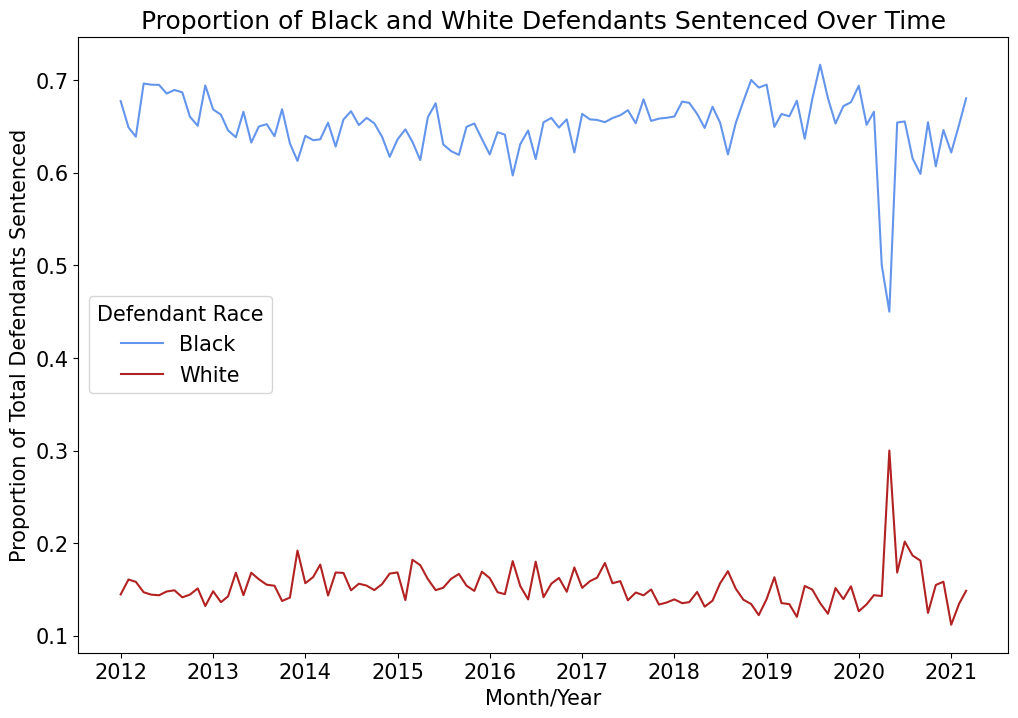

In [125]:
## Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. 
## Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names
## (e.g., Black or White rather than prop_black or prop_white)

plt.figure(figsize=(12,8))
## Black defendants line plot:
plt.plot(prop_table.month_year, prop_table.black_proportion,
         label="Black", color="cornflowerblue")
plt.plot(prop_table.month_year, prop_table.white_proportion,
         label="White", color="firebrick")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Month/Year", fontsize=15)
plt.ylabel("Proportion of Total Defendants Sentenced", fontsize=15)

plt.title("Proportion of Black and White Defendants Sentenced Over Time", fontsize=18)
plt.legend(title="Defendant Race", fontsize=15, title_fontsize=15)

In [ ]:
## Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. 
IDK WHAT THIS MEANS

## What seems to be going on in April and May 2020?

## In April and May 2020, there is a noticeable decrease in the proportion of Black defendants
## and a noticeable increase in the proportion of White defendants sentenced compared to other months.
## Perhaps this was in response to the Black Lives Matter movement, which drew attention to 
## discrimination on the basis of race in criminal justice proceedings.

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [135]:
common_black = (df_cleaned[df_cleaned["is_black_derived"]==True]
               ["simplified_offense_derived"]
                .value_counts()
                .sort_values(ascending=False)
                .head(10))
## Check:
common_black

common_white = (df_cleaned[df_cleaned["is_white_derived"]==True]
               ["simplified_offense_derived"]
                .value_counts()
                .sort_values(ascending=False)
                .head(10))

## Check:
common_white

## set turns both data frames into sets so we can combine them into one union
## we need .index in order to just grab the information for offense rather than the count
frequent_offenses = set(common_black.index).union(set(common_white.index))
print(frequent_offenses)


simplified_offense_derived
Narcotics                                    29451
UUW - Unlawful Use of Weapon                  9608
Retail Theft                                  6812
Battery                                       4650
Driving With Suspended Or Revoked License     4459
DUI                                           3842
Burglary                                      3798
Theft                                         2623
Vehicle-related                               2400
Robbery                                       2348
Name: count, dtype: int64

simplified_offense_derived
Narcotics                                    4923
Retail Theft                                 2509
DUI                                          1995
Burglary                                     1454
Battery                                      1448
Driving With Suspended Or Revoked License    1160
Theft                                        1095
Residential Burglary                          717
Other Offense                                 569
UUW - Unlawful Use of Weapon                  527
Name: count, dtype: int64

{'Retail Theft', 'Burglary', 'Battery', 'Vehicle-related', 'UUW - Unlawful Use of Weapon', 'Other Offense', 'Narcotics', 'Residential Burglary', 'Driving With Suspended Or Revoked License', 'DUI', 'Robbery', 'Theft'}


### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [153]:
## First filter data for only top offenses and create an is_incarcerated column
df_filtered = df_cleaned[df_cleaned["simplified_offense_derived"].isin(frequent_offenses)].copy()
df_filtered["is_incarcerated"] = df_filtered["COMMITMENT_TYPE"] == "Illinois Department of Corrections"

## calculate Black incarceration rates by filtering for Black defendants and then
## calculating the mean of "is_incarcerated" for each offense in the the frequent offenses list:
black_incarceration = (df_filtered[df_filtered["is_black_derived"]==True]
                      .groupby("simplified_offense_derived")
                       ["is_incarcerated"].mean()
                      .rename("black incarceration rate"))

## calculate White incarceration rates by filtering for White defendants and then
## calculating the mean of "is_incarcerated" for each offense in the the frequent offenses list:
white_incarceration = (df_filtered[df_filtered["is_white_derived"]==True]
                      .groupby("simplified_offense_derived")
                       ["is_incarcerated"].mean()
                      .rename("white incarceration rate"))

## is there another way to do this without concat?
table = pd.concat([black_incarceration, white_incarceration], axis=1)

table["Black - White"] = (table["black incarceration rate"] - table["white incarceration rate"])

table

## Looking at the Black-White column, we see that Narcotics, Battery, and Unlawful Use of Weapon show the largest disparities
## in judges being less likely to sentence White defendants to incarceration than Black defendants. 



,black incarceration rate,white incarceration rate,Black - White
simplified_offense_derived,,,
Battery,0.509032,0.275552,0.233480
Burglary,0.661927,0.535763,0.126164
DUI,0.404997,0.341855,0.063143
Driving With Suspended Or Revoked License,0.582193,0.496552,0.085642
Narcotics,0.537876,0.242535,0.295341
Other Offense,0.340580,0.230228,0.110351
Residential Burglary,0.717791,0.654114,0.063677
Retail Theft,0.595713,0.449582,0.146132
Robbery,0.650341,0.589286,0.061055


### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


### 2.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 